<a href="https://colab.research.google.com/github/EmmillyDias/Analise-de-interesse-dos-clientes-da-Confeitaria-Tudo-Com-Amor/blob/main/Desafio_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EBA: Desafio ifood
O objetivo é fazer uma análise exploratória desses dados. Responda usando a sua ferramenta de preferência:


Quantos dados temos? Linhas e colunas;
Quais são as colunas numéricas?;
Temos duplicados na nossa base? Se tivermos, retire-os;
Temos dados nulos nessa base?; Será que eles indicam algo?; O que fazer com eles?;
Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

In [1]:
#Importando algumas bibliotecas que serão úteis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando base de dados
df = pd.read_csv('/content/mkt_data.csv')

In [3]:
#Verfiicar os dados (linhas e colunas)
df.shape
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [4]:
#Verificar quais são as colunas numéricas
df.select_dtypes(include='number').columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

In [5]:
#Verificar se há dados duplicados
df.duplicated().sum()

np.int64(0)

In [6]:
#Verificar se há nulos
df.isnull().mean() * 100

,0
Unnamed: 0,0.000000
Income,0.000000
Kidhome,0.000000
Teenhome,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000
MntMeatProducts,0.000000
MntFishProducts,0.000000
MntSweetProducts,0.000000


In [7]:
#Ver linhas onde existe nulo
df[df.isnull().any(axis=1)]

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [8]:
#Preenche com média (somente para numéricos)
df.fillna(df.mean(numeric_only=True))

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,4.0,5.0,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,4.0,5.0,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,4.0,5.0,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,4.0,5.0,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,3.0,4.0,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,4.0,5.0,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,3.0,4.0,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,4.0,5.0,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,3.0,4.0,5.0,782,721,0,Together,Master,1,782


In [9]:
# média, mediana, percentis, mínimo e máximo
df.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,198.0,54.0,1113.0,364.0,476.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.00000,3.000000,2491.000000


## Entendendo o perfil de clientes que temos
Qual é o maior salário encontrado na nossa base? Veja na coluna Income;
Qual é a distribuição de salário na nossa base?; Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income;
Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level;
Quantos clientes temos em cada estado civil? Veja na coluna marital_status;


In [10]:
#Qual é o maior salário da base?
df['Income'].max()

113734.0

In [11]:
#Como é a distribuição de salário?
df['Income'].describe()

,Income
count,2205.000000
mean,51622.094785
std,20713.063826
min,1730.000000
25%,35196.000000
50%,51287.000000
75%,68281.000000
max,113734.000000


O valor da média é maior em comparação com a mediana, o que significa que poucos clientes ganham muito bem.

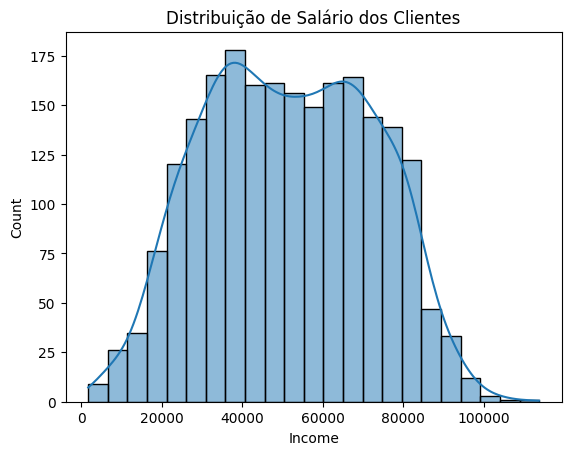

In [12]:
#Visualização da distribuição
sns.histplot(df['Income'], kde=True)
plt.title('Distribuição de Salário dos Clientes')
plt.show()

O histograma demonstra que dentro da base de dados, existe cliente que ganham muito bem e outros que não. Sendo que a maior quantidade de clientes recebem o valor salário anual aproximado a R$ 40.000.

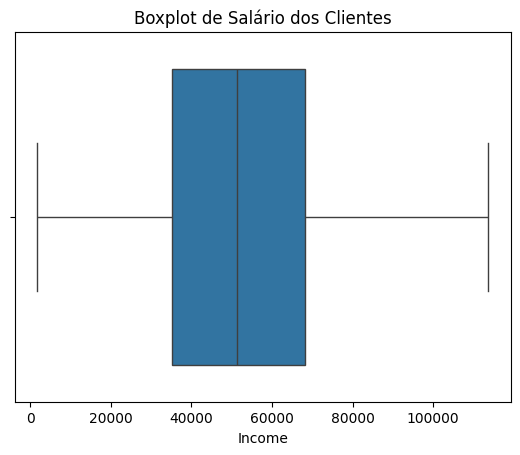

In [13]:
#Boxplot para detectar extremos (outliers)
sns.boxplot(x=df['Income'])
plt.title('Boxplot de Salário dos Clientes')
plt.show()

In [14]:
#Nível de educação dos clientes
df['education_level'].value_counts()


,count
education_level,
Graduation,1113
PhD,476
Master,364
2n Cycle,198
Basic,54


In [15]:
#Nível de educação dos clientes em percentual
df['education_level'].value_counts(normalize=True)*100

,proportion
education_level,
Graduation,50.476190
PhD,21.587302
Master,16.507937
2n Cycle,8.979592
Basic,2.448980


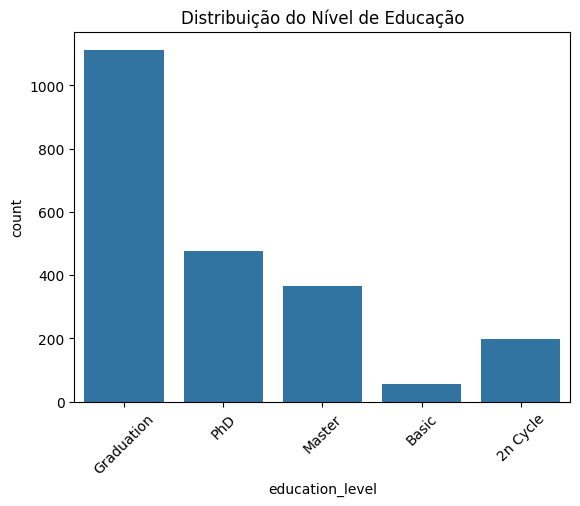

In [16]:
#Visualização nível de educação dos clientes em percentual
sns.countplot(x=df['education_level'])
order=df['education_level'].value_counts().index
plt.title('Distribuição do Nível de Educação')
plt.xticks(rotation=45)
plt.show()


Isso explica o porque da maioria dos clientes recebem bons salários, pois mais de 70% dos clientes apresenta o nível de educação superior. Além disso, esses dados demosntram que as campanhas podem ser mais informativas, pois o nível da maioria dos clientes é superior.

In [17]:
#Quantos clientes temos em cada estado civil?
df['marital_status'].value_counts()

,count
marital_status,
Married,854
Together,568
Single,477
Divorced,230
Widow,76


In [18]:
#Quantos clientes temos em cada estado civil em percentual
df['marital_status'].value_counts(normalize=True)*100

,proportion
marital_status,
Married,38.730159
Together,25.759637
Single,21.632653
Divorced,10.430839
Widow,3.446712


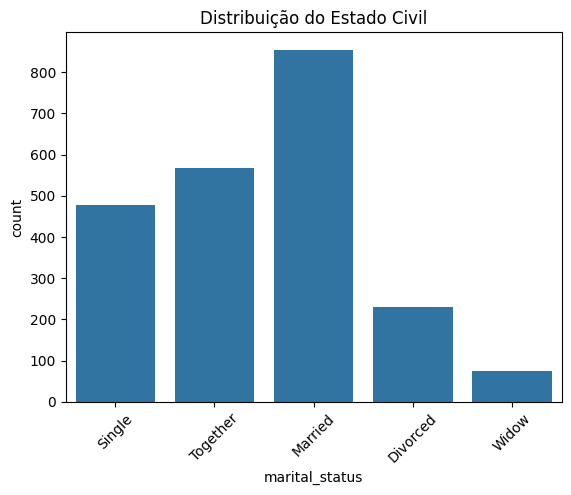

In [19]:
#Visualização de quantos clientes temos em cada estado civil
sns.countplot(x=df['marital_status'])
order=df['marital_status'].value_counts().index
plt.title('Distribuição do Estado Civil')
plt.xticks(rotation=45)
plt.show()

Maior parte de cliente apresentam estado civil de casado. Isso pode ser um indicativo para apostar em campanhas direcionadas para esse público.

## Correlação dos dados

Qual é a relação de estado civil com número de filhos?; Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids;
As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids;
Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses.


In [21]:
#Pessoas casadas tem mais filhos? (Média de filhos por estado civil)
df.groupby('marital_status')['kids'].mean().sort_values(ascending=False)

,kids
marital_status,
Divorced,1.008696
Together,0.980634
Married,0.967213
Widow,0.881579
Single,0.859539


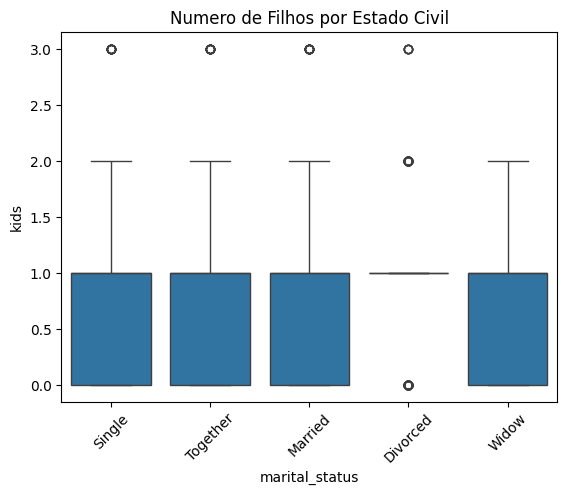

In [24]:
#Distribuição visual da média de filhos por estado civil
sns.boxplot(data=df, x='marital_status', y='kids')
plt.title('Numero de Filhos por Estado Civil')
plt.xticks(rotation=45)
plt.show()


A correlação de numeros de filhos com o estado civil apresentam resultados paralelo, ou seja, o estado civil não influencia na quantidade de filhos.  

In [25]:
#Pessoas com filhos gastam mais ou menos? (Gasto médio por número de filhos)
df.groupby('kids')['expenses'].mean()

,expenses
kids,
0,1041.207006
1,434.530576
2,221.568675
3,237.380000


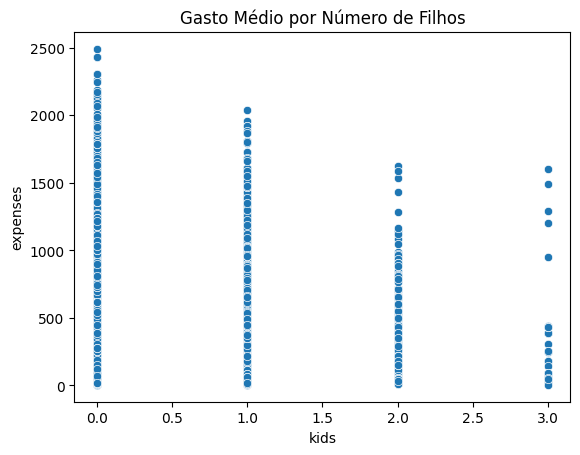

In [26]:
#Visualização da tendência
sns.scatterplot(data=df, x='kids', y='expenses')
plt.title('Gasto Médio por Número de Filhos')
plt.show()

De acordo com o gráfico, quanto maior a quantidade de filhos, mais restrito são os gastos.

In [28]:
#Correlação numérica
df[['kids', 'expenses']]. corr()

,kids,expenses
kids,1.000000,-0.499025
expenses,-0.499025,1.000000


In [30]:
#Quem ganha mais gasta mais?
df[['Income','expenses']].corr()

,Income,expenses
Income,1.000000,0.823066
expenses,0.823066,1.000000


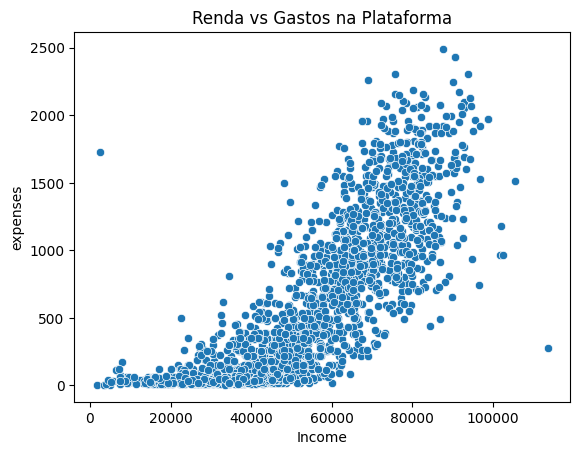

In [31]:
#Visualização da hipotese
sns.scatterplot(data=df, x='Income', y='expenses')
plt.title('Renda vs Gastos na Plataforma')
plt.show()

In [34]:
#Média de gastos por faixa de renda (mais estatégico)
df['Income_faixa'] = pd.qcut(df['Income'], q=4)
df.groupby('Income_faixa')['expenses'].mean()

/tmp/ipython-input-1263654077.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_faixa')['expenses'].mean()


,expenses
Income_faixa,
"(1729.999, 35196.0]",64.764919
"(35196.0, 51287.0]",202.461818
"(51287.0, 68281.0]",691.488203
"(68281.0, 113734.0]",1293.497278


In [36]:
#Visualização de gastos por faixa de renda
#Divisão da base em 4 grupos (renda mais baixa, média-baixa, média-alta, renda mais alta)
df['Income_faixa'] = pd.qcut(df['Income'],q=4)

In [39]:
#Calcular média de gastos por faixa de renda
gastos_por_faixa = df.groupby('Income_faixa')['expenses'].mean().reset_index()

/tmp/ipython-input-3711680111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_por_faixa = df.groupby('Income_faixa')['expenses'].mean().reset_index()


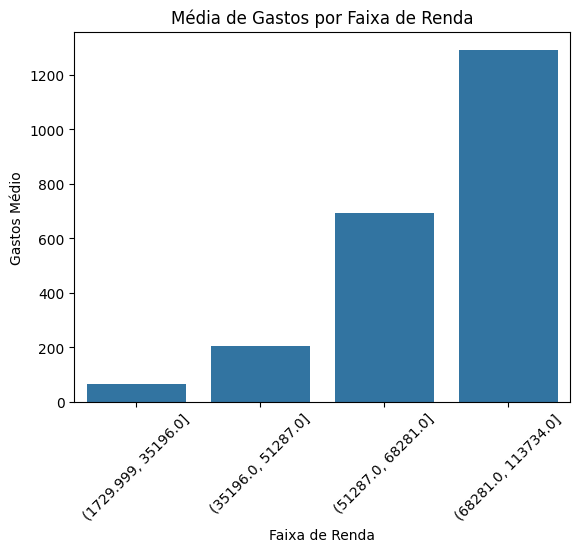

In [41]:
#Visualização: média de gastos por faixa de renda
sns.barplot(data=gastos_por_faixa, x='Income_faixa', y='expenses')
plt.title('Média de Gastos por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Gastos Médio')
plt.xticks(rotation=45)
plt.show()

Gráfico de barras crescentes, o que demonstra que quanto maior a renda, maior o gasto. Dessa forma, o foco deve ser em clientes de alta renda.